In [1]:
#Kaksinkertaista eksponentiaalista tasoitusta kutsutaan myös Holtin malliksi.
#Kaksinkertainen eksponentiaalinen tasoitus sopii aikasarjoille, joissa on trendi, mutta ei havaittavaa kausivaihtelua. Eksponentiaalisen tasoituksen mallit (yksinkertainen, kaksinkertainen ja kolminkertainen) ovat erityisen suosittuja liiketaloudessa kysynnän ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä uusien havaintojen myötä.
#Eksponentiaalinen tasoitus löytyy statsmodels.tsa-kirjastosta.
#Huomaa, että tässä esimerkissä kaksinkertainen eksoponentiaalinen tasoitus ei ole hyvä malli, koska aikasarjassa on selkeä kausivaihtelu, jonka malli jättää huomiotta!
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
df=pd.read_excel('Saapuneet puhelut kktasolla.xlsx')
df

,Kuukausi,Saapuneet
0,2017-12-01,3714
1,2018-01-01,6185
2,2018-02-01,5615
3,2018-03-01,5381
4,2018-04-01,7284
5,2018-05-01,20116
6,2018-06-01,13238
7,2018-07-01,7594
8,2018-08-01,7968
9,2018-09-01,31344


In [4]:
df.index = pd.to_datetime(df['Kuukausi'],format="%Y-%m")
df=df.drop('Kuukausi',axis=1)
df

,Saapuneet
Kuukausi,
2017-12-01,3714
2018-01-01,6185
2018-02-01,5615
2018-03-01,5381
2018-04-01,7284
2018-05-01,20116
2018-06-01,13238
2018-07-01,7594
2018-08-01,7968


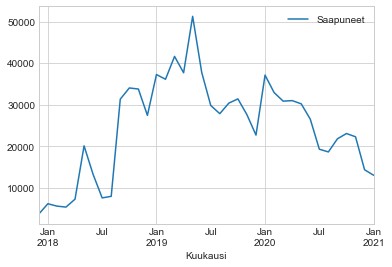

In [5]:
df.plot()

In [6]:
#Mallin sovitus
#Ennustemalli sovitetaan (fit()) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi malli), joka sisältää monenlaista tietoa mallista.
#freq-parametrille käytän arvoa 'MS', koska kyseessä oN kuukauden 1. päivä. Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
malli = ExponentialSmoothing(df['Saapuneet'], trend = 'add', freq='MS').fit()

In [7]:
# malli-olion avulla saadaan mallin mukaan simuloidut ennusteet (fittedvalues)
df['Kone-ennuste'] = malli.fittedvalues
df

,Saapuneet,Kone-ennuste
Kuukausi,,
2017-12-01,3714,1029.484500
2018-01-01,6185,3554.640697
2018-02-01,5615,6037.152805
2018-03-01,5381,6116.032357
2018-04-01,7284,5948.541886
2018-05-01,20116,7411.412943
2018-06-01,13238,17826.650934
2018-07-01,7594,14624.714491
2018-08-01,7968,9499.829584


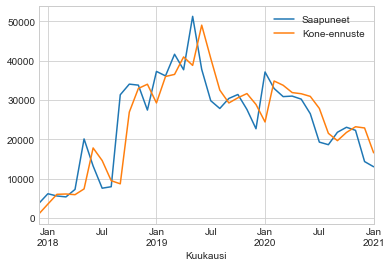

In [8]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [9]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Saapuneet,Kone-ennuste,Ennustevirhe
Kuukausi,,,
2017-12-01,3714,1029.484500,2684.515500
2018-01-01,6185,3554.640697,2630.359303
2018-02-01,5615,6037.152805,-422.152805
2018-03-01,5381,6116.032357,-735.032357
2018-04-01,7284,5948.541886,1335.458114
2018-05-01,20116,7411.412943,12704.587057
2018-06-01,13238,17826.650934,-4588.650934
2018-07-01,7594,14624.714491,-7030.714491
2018-08-01,7968,9499.829584,-1531.829584


Text(0, 0.5, 'Ennustevirhe')

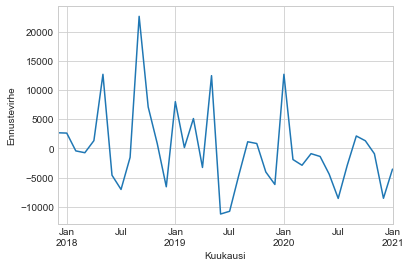

In [10]:
#Mallin tarkastelu
#Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
#ennustevirheiden aikasarjaa viivakaaviona
#ennusteiden ja toteutuneiden arvojen hajontakaaviota
#malliin liittyvää statistiikkaa, jonka saan summary()-toiminnolla.
#Huomaa erityisesti SSE (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

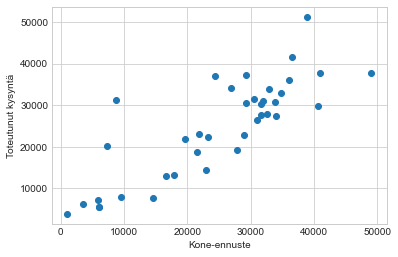

In [11]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Kone-ennuste'], y = df['Saapuneet'])
plt.xlabel('Kone-ennuste')
plt.ylabel('Toteutunut kysyntä')

In [12]:
malli.summary()

Dep. Variable:,endog,No. Observations:,38
Model:,ExponentialSmoothing,SSE,1805226465.544
Optimized:,True,AIC,679.702
Trend:,Additive,BIC,686.252
Seasonal:,None,AICC,682.412
Seasonal Periods:,None,Date:,"Tue, 02 Feb 2021"
Box-Cox:,False,Time:,08:53:27
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7874277,alpha,True
smoothing_slope,0.000000,beta,True


In [13]:
#Ennusteiden laskeminen
#Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
#Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.
#Ennustettavien ajankohtien lukumäärän voin määrittää periods-parametrilla.
#Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty freq-parametrin arvo.
#Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
#Tarkistan viimeisen aikaleiman
df.tail()

,Saapuneet,Kone-ennuste,Ennustevirhe
Kuukausi,,,
2020-09-01,21814,19680.727791,2133.272209
2020-10-01,23083,21771.819757,1311.180243
2020-11-01,22302,23215.573746,-913.573746
2020-12-01,14365,22907.494842,-8542.494842
2021-01-01,13044,16592.192227,-3548.192227


In [16]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('2021-02-01', periods = 6, freq = 'MS')

# Ennusteet 6 kuukaudelle
ennusteet = malli.forecast(6)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

,Ennuste
2021-02-01,14209.541780
2021-03-01,14620.836140
2021-04-01,15032.130499
2021-05-01,15443.424859
2021-06-01,15854.719219
2021-07-01,16266.013579


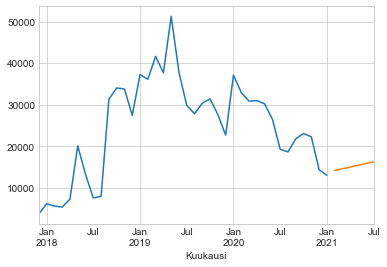

In [17]:
# Viivakaavio havainnoista
df['Saapuneet'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

In [18]:
df.head()

,Saapuneet,Kone-ennuste,Ennustevirhe
Kuukausi,,,
2017-12-01,3714,1029.484500,2684.515500
2018-01-01,6185,3554.640697,2630.359303
2018-02-01,5615,6037.152805,-422.152805
2018-03-01,5381,6116.032357,-735.032357
2018-04-01,7284,5948.541886,1335.458114


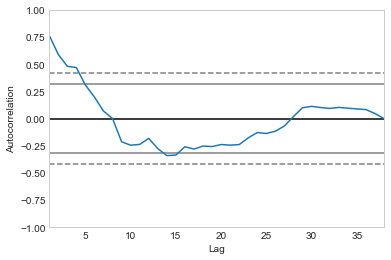

In [21]:
#Aikasarjassa on erotettavissa viiden kuukauden jaksoissa toistuva kausivaihtelu, jota kaksinkertainen 
#eksponentiaalinen tasoitus ei huomioi ennusteessa. Asiaa voin tarkastella myös autokorrelaatioiden avulla. 
#Autokorrelaatio tarkoittaa aikasarjan korrelaatiota viivästetyn aikasarjan kanssa, esimerkiksi aikasarjan 
#korrelaatio viiden kuukauden takaisiin aikasarjan arvoihin. Autokorrelaatio voidaan laskea eri viiveille. 
#Tämän voin tehdä pandas-kirjaston autocorrelation_plot-toiminnolla:
#Vaaka-akselilla on viive (lag) ja pystyakselilla autokorrelaatiokertoimen arvo. Huomaan, että viiveen 0-5 
#kohdalla on suurehko korrelaatio. Tämä viittaa  kausivaihtelujaksoon. Kuvion katkoviivat edustavat 
#tilastollisesti merkitsevän korrelaation rajoja. Ennen viivettä 5 kohdalla korrelaatio on katkoviivan 
#yläpuolella ja näin ollen tilastollisesti merkitsevä.
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Saapuneet'])

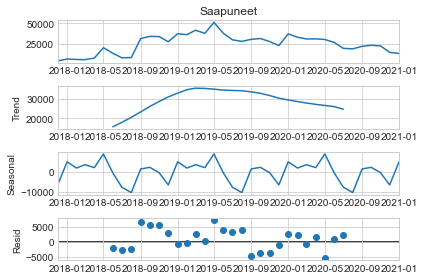

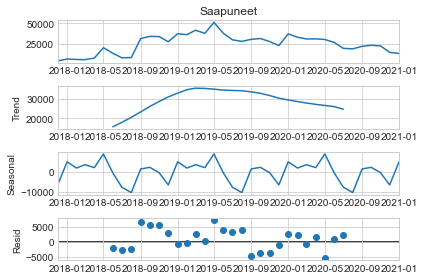

In [20]:
from statsmodels.tsa.api import seasonal_decompose
seasonal_decompose(df['Saapuneet']).plot()